# Assignment1

## Guanxiang Zhao
## gzha644

### Task1: Load the datasets. 

In [1]:
import os

import numpy as np
from pathlib import Path
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from mlxtend.evaluate import paired_ttest_kfold_cv
import matplotlib.pyplot as plt
import pandas as pd
from pandas.api.types import CategoricalDtype


ModuleNotFoundError: No module named 'mlxtend'

###### website-phishing dataset

Load the website phishing dataset from csv file. There is no any missing data in this dataset. 

In [2]:
website_phishing = pd.read_csv('website-phishing.csv')
website_phishing.head()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Class
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1


###### BCP dataset

Load the BCP dataset from csv file. There is no any missing data in this dataset. Deleting the first colume because the 'Sample code number' colume is no used for build model. 

In [3]:
BCP = pd.read_csv('BCP.csv')
BCP.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [4]:
# Dop the 'Sample code number' colume.
BCP = BCP.drop(['Sample code number'], axis=1)
BCP.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


###### arrhythmia dataset

Load the arrhythmia dataset from csv file. There are some missing value in 'T', 'P', 'QRST', 'J' and  'heartrate' columes. Both of these columes data dosen't have relationship with other columes, so we can use the mean values to fill these missing datas. 

In [5]:
# Replace "?" to NaN when loading the csv file. 
arrhythmia = pd.read_csv('arrhythmia.csv',na_values = '?')
arrhythmia.head()

,age,sex,height,weight,QRSduration,PRinterval,Q-Tinterval,Tinterval,Pinterval,QRS,...,chV6_QwaveAmp,chV6_RwaveAmp,chV6_SwaveAmp,chV6_RPwaveAmp,chV6_SPwaveAmp,chV6_PwaveAmp,chV6_TwaveAmp,chV6_QRSA,chV6_QRSTA,class
0,75,0,190,80,91,193,371,174,121,-16,...,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,...,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7


In [6]:
# Find the colums which have missing datas. 
arrhythmia.isnull().sum()

age              0
 sex             0
 height          0
 weight          0
 QRSduration     0
                ..
chV6_PwaveAmp    0
chV6_TwaveAmp    0
chV6_QRSA        0
chV6_QRSTA       0
class            0
Length: 280, dtype: int64

In [7]:
# Caculate the mean value of " T" colume the replace the data. 
arrhythmia[" T"] = arrhythmia[" T"].replace(np.NaN, arrhythmia[' T'].mean(axis=0))
# Caculate the mean value of " P" colume the replace the data. 
arrhythmia[" P"] = arrhythmia[" P"].replace(np.NaN, arrhythmia[' P'].mean(axis=0))
# Caculate the mean value of " QRST" colume the replace the data. 
arrhythmia[" QRST"] = arrhythmia[" QRST"].replace(np.NaN, arrhythmia[' QRST'].mean(axis=0))
# Caculate the mean value of " heartrate" colume the replace the data. 
arrhythmia[" heartrate"] = arrhythmia[" heartrate"].replace(np.NaN, arrhythmia[' heartrate'].mean(axis=0))
# Caculate the mean value of " J" colume the replace the data. 
arrhythmia[" J"] = arrhythmia[" J"].replace(np.NaN, arrhythmia[' J'].mean(axis=0))

### Task2

###### website-phishing dataset

Spliting the dataset to X set and Y set, randomly pick up 80% datas frome dataset as trainging datas and others 20% as test datas. 

Decision stump:

In [8]:
# Split data
wp_y = website_phishing['  Class ']
wp_x = website_phishing.drop(['  Class '], axis=1).to_numpy()
print(wp_x.shape, wp_y.shape)

(11055, 30) (11055,)


In [9]:
wp_stump = DecisionTreeClassifier(random_state=1234, max_depth=1)
wp_stump.fit(wp_x, wp_y)

DecisionTreeClassifier(max_depth=1, random_state=1234)

In [10]:
score = wp_stump.score(wp_x, wp_y)
print('Accuracy on datasets: {:.2f}%'.format(score * 100))

Accuracy on datasets: 88.89%


Decision tree:

In [11]:
wp_x_train, wp_x_test, wp_y_train, wp_y_test = train_test_split(wp_x, wp_y, test_size=0.2, random_state=1234)
print(wp_x_train.shape, wp_x_test.shape)


(8844, 30) (2211, 30)


In [12]:
wp_model = DecisionTreeClassifier(random_state=1234)
wp_model.fit(wp_x_train, wp_y_train)

DecisionTreeClassifier(random_state=1234)

In [13]:
score = wp_model.score(wp_x_train, wp_y_train)
print('Accuracy on train set: {:.2f}%'.format(score * 100))

score = wp_model.score(wp_x_test, wp_y_test)
print('Accuracy on test set: {:.2f}%'.format(score * 100))

Accuracy on train set: 98.97%
Accuracy on test set: 96.34%


Pruned decision tree:
Used the pre-pruning techniques as pruning strategy to obtain the pruned decision tree.Pre-pruning techniques is set some hyperparameters when build the decision tree. In the following code,I use pre-pruning with max depth method.

In [14]:
wp_model_after = DecisionTreeClassifier(random_state=1234, max_depth = 14)
wp_model_after.fit(wp_x_train, wp_y_train)

DecisionTreeClassifier(max_depth=14, random_state=1234)

In [15]:
score = wp_model_after.score(wp_x_train, wp_y_train)
print('Accuracy on train set: {:.2f}%'.format(score * 100))

score = wp_model_after.score(wp_x_test, wp_y_test)
print('Accuracy on test set: {:.2f}%'.format(score * 100))

Accuracy on train set: 97.92%
Accuracy on test set: 96.02%


###### BCP dataset

Decision Stump:

In [16]:
# Split data
bcp_y = BCP['Class']
bcp_x = BCP.drop(['Class'], axis=1).to_numpy()
print(bcp_x.shape, bcp_y.shape)

(683, 9) (683,)


In [17]:
bcp_stump = DecisionTreeClassifier(random_state=1234, max_depth=1)
bcp_stump.fit(bcp_x, bcp_y)

DecisionTreeClassifier(max_depth=1, random_state=1234)

In [18]:
score = bcp_stump.score(bcp_x, bcp_y)
print('Accuracy on datasets: {:.2f}%'.format(score * 100))

Accuracy on datasets: 92.68%


Decision Tree: 

In [19]:
bcp_x_train, bcp_x_test, bcp_y_train, bcp_y_test = train_test_split(bcp_x, bcp_y, test_size=0.2, random_state=1234)
print(bcp_x_train.shape, bcp_x_test.shape)

(546, 9) (137, 9)


In [20]:
bcp_model = DecisionTreeClassifier(random_state=1234)
bcp_model.fit(bcp_x_train, bcp_y_train)

DecisionTreeClassifier(random_state=1234)

In [21]:
score = bcp_model.score(bcp_x_train, bcp_y_train)
print('Accuracy on train set: {:.2f}%'.format(score * 100))

score = bcp_model.score(bcp_x_test, bcp_y_test)
print('Accuracy on test set: {:.2f}%'.format(score * 100))

Accuracy on train set: 100.00%
Accuracy on test set: 94.89%


Pruned decision tree:
Used the pre-pruning techniques as pruning strategy to obtain the pruned decision tree. Limited the number of depth to 3 could get the higher Accuracy on test set. When the max_depth greater or smaller than 3, the accuracy on test will decrease. 

In [22]:
bcp_model_after = DecisionTreeClassifier(random_state=1234, max_depth = 3)
bcp_model_after.fit(bcp_x_train, bcp_y_train)

DecisionTreeClassifier(max_depth=3, random_state=1234)

In [23]:
score = bcp_model_after.score(bcp_x_train, bcp_y_train)
print('Accuracy on train set: {:.2f}%'.format(score * 100))

score = bcp_model_after.score(bcp_x_test, bcp_y_test)
print('Accuracy on test set: {:.2f}%'.format(score * 100))

Accuracy on train set: 96.52%
Accuracy on test set: 95.62%


###### arrhythmia dataset

Decision Stump: 

In [24]:
# Split data
arrhythmia_y = arrhythmia['class']
arrhythmia_x = arrhythmia.drop(['class'], axis=1).to_numpy()
print(arrhythmia_x.shape, arrhythmia_y.shape)

(452, 279) (452,)


In [25]:
arrhythmia_stump = DecisionTreeClassifier(random_state=1234, max_depth=1)
arrhythmia_stump.fit(arrhythmia_x, arrhythmia_y)

DecisionTreeClassifier(max_depth=1, random_state=1234)

In [26]:
score = arrhythmia_stump.score(arrhythmia_x, arrhythmia_y)
print('Accuracy on datasets: {:.2f}%'.format(score * 100))

Accuracy on datasets: 60.40%


Decision Tree: 

In [27]:
arrhythmia_x_train, arrhythmia_x_test, arrhythmia_y_train, arrhythmia_y_test = train_test_split(arrhythmia_x, arrhythmia_y, test_size=0.2, random_state=1234)
print(arrhythmia_x_train.shape, arrhythmia_x_test.shape)

(361, 279) (91, 279)


In [28]:
arrhythmia_model = DecisionTreeClassifier(random_state=1234)
arrhythmia_model.fit(arrhythmia_x_train, arrhythmia_y_train)

DecisionTreeClassifier(random_state=1234)

In [29]:
score = arrhythmia_model.score(arrhythmia_x_train, arrhythmia_y_train)
print('Accuracy on train set: {:.2f}%'.format(score * 100))

score = arrhythmia_model.score(arrhythmia_x_test, arrhythmia_y_test)
print('Accuracy on test set: {:.2f}%'.format(score * 100))

Accuracy on train set: 100.00%
Accuracy on test set: 60.44%


Pruned decision tree:
Used the pre-pruning techniques as pruning strategy to obtain the pruned decision tree. Change the max_depth could solve the overfit problem. Limited the number of depths to 3 could get the same accuracy on test set and reduce the overfit problem. 

In [30]:
arrhythmia_model_after = DecisionTreeClassifier(random_state=1234, max_depth = 3)
arrhythmia_model_after.fit(arrhythmia_x_train, arrhythmia_y_train)

DecisionTreeClassifier(max_depth=3, random_state=1234)

In [31]:
score = arrhythmia_model_after.score(arrhythmia_x_train, arrhythmia_y_train)
print('Accuracy on train set: {:.2f}%'.format(score * 100))

score = arrhythmia_model_after.score(arrhythmia_x_test, arrhythmia_y_test)
print('Accuracy on test set: {:.2f}%'.format(score * 100))

Accuracy on train set: 73.41%
Accuracy on test set: 60.44%


### Task3

For select the hyperparameters correctly, we need the GridSearchCV from sklearn package for giving the best hyperparameter which gives the best score from set of hyperparameters. In the following code, I find the depth of each decision tree for each dataset, the put all the possiable value as varibles in GridSearchCV function and use the best params as hyperparameters to create the decision trees. 

###### website-phishing dataset

In [32]:
print(wp_model.get_depth())
param_dict = {"max_depth":range(2,21,1)}
wp_search = GridSearchCV(wp_model, param_dict, cv = 5)
wp_search.fit(wp_x_train, wp_y_train)
print(wp_search.best_params_)

21
{'max_depth': 20}


In [33]:
wp_model_search = DecisionTreeClassifier(random_state=1234, max_depth = 20)
wp_model_search.fit(wp_x_train, wp_y_train)

DecisionTreeClassifier(max_depth=20, random_state=1234)

In [34]:
score = wp_model_search.score(wp_x_train, wp_y_train)
print('Accuracy on train set: {:.2f}%'.format(score * 100))

score = wp_model_search.score(wp_x_test, wp_y_test)
print('Accuracy on test set: {:.2f}%'.format(score * 100))

Accuracy on train set: 98.96%
Accuracy on test set: 96.16%


###### BCP dataset

In [35]:
print(bcp_model.get_depth())

9


In [36]:
param_dict = {"max_depth":range(2,9,1)}
bcp_search = GridSearchCV(bcp_model, param_dict, cv = 5)
bcp_search.fit(bcp_x_train, bcp_y_train)
print(bcp_search.best_params_)

{'max_depth': 4}


In [37]:
bcp_model_search = DecisionTreeClassifier(random_state=1234, max_depth = 4)
bcp_model_search.fit(bcp_x_train, bcp_y_train)

DecisionTreeClassifier(max_depth=4, random_state=1234)

In [38]:
score = bcp_model_search.score(bcp_x_train, bcp_y_train)
print('Accuracy on train set: {:.2f}%'.format(score * 100))

score = bcp_model_search.score(bcp_x_test, bcp_y_test)
print('Accuracy on test set: {:.2f}%'.format(score * 100))

Accuracy on train set: 97.99%
Accuracy on test set: 93.43%


###### arrhythmia dataset

In [39]:
print(arrhythmia_model.get_depth())

21


In [40]:
param_dict = {"max_depth":range(2,21,1)}
arrhythmia_search = GridSearchCV(arrhythmia_model, param_dict, cv = 5)
arrhythmia_search.fit(arrhythmia_x_train, arrhythmia_y_train)
print(arrhythmia_search.best_params_)

C:\Users\zhaog\anaconda3\envs\venv\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


{'max_depth': 6}


In [41]:
arrhythmia_model_search = DecisionTreeClassifier(random_state=1234, max_depth = 6)
arrhythmia_model_search.fit(arrhythmia_x_train, arrhythmia_y_train)

DecisionTreeClassifier(max_depth=6, random_state=1234)

In [42]:
score = arrhythmia_model_search.score(arrhythmia_x_train, arrhythmia_y_train)
print('Accuracy on train set: {:.2f}%'.format(score * 100))

score = arrhythmia_model_search.score(arrhythmia_x_test, arrhythmia_y_test)
print('Accuracy on test set: {:.2f}%'.format(score * 100))

Accuracy on train set: 88.64%
Accuracy on test set: 67.03%


### Task4

###### website-phishing dataset

In this task, used paired_ttest_kfold_cv method from mlxtend package to the K-fold cross-validated paired t test, this method could split and iteration 10 times during the cross-validation procedure. 

Compare decision stump and unpruned decision tree

Null hypothesis (H0) = Error rates of website-phishing decision stump & unpruned decision tree are the same

In [43]:
t, p = paired_ttest_kfold_cv(estimator1=wp_stump,
                              estimator2=wp_model,
                              X=wp_x, y=wp_y,
                              random_seed=1234)
print('t statistic: %.3f' % t)
print('p value: %.3f' % p)

score = wp_stump.score(wp_x_test, wp_y_test)
print('Accuracy on decision stump test set: {:.2f}%'.format(score * 100))
score = wp_model.score(wp_x_test, wp_y_test)
print('Accuracy on unpruned decision tree test set: {:.2f}%'.format(score * 100))

t statistic: -8.560
p value: 0.000
Accuracy on decision stump test set: 88.60%
Accuracy on unpruned decision tree test set: 98.55%


Because p value is 0, which is less than 0.05, that's means the website-phishing decision stump and unpruned decision tree having the same error rates is less than 5%. So there is evidence support that there is statistically difference between website-phishing decision stump and unpruned decision tree. The error rate of unpruned decision tree is less than decision stump, so in that case the decision stump is worse than unpruned decision tree.

Compare decision stump and pruned decision tree

Null hypothesis (H0) = Error rates of website-phishing decision stump and pruned decision tree are the same

In [44]:
t, p = paired_ttest_kfold_cv(estimator1=wp_stump,
                              estimator2=wp_model_search,
                              X=wp_x, y=wp_y,
                              random_seed=1234)
print('t statistic: %.3f' % t)
print('p value: %.3f' % p)

score = wp_stump.score(wp_x_test, wp_y_test)
print('Accuracy on decision stump test set: {:.2f}%'.format(score * 100))
score = wp_model_search.score(wp_x_test, wp_y_test)
print('Accuracy on pruned decision tree test set: {:.2f}%'.format(score * 100))

t statistic: -9.104
p value: 0.000
Accuracy on decision stump test set: 88.60%
Accuracy on pruned decision tree test set: 98.51%


Because p value is 0, which is less than 0.05, that's means the website-phishing decision stump and pruned decision tree having the same error rates is less than 5%. So there is evidence support that there is statistically difference between website-phishing decision stump and pruned decision tree. The error rate of pruned decision tree is less than decision stump, so in that case the decision stump is worse than pruned decision tree.

Compare unpruned decision tree and pruned decision tree

Null hypothesis (H0) = Error rates of website-phishing unpruned decision tree and pruned decision tree are the same

In [45]:
t, p = paired_ttest_kfold_cv(estimator1=wp_model,
                              estimator2=wp_model_search,
                              X=wp_x, y=wp_y,
                              random_seed=1234)
print('t statistic: %.3f' % t)
print('p value: %.3f' % p)

t statistic: -1.475
p value: 0.174


Because p value is 0.174, which is greater than 0.05, that's means the error rates of website-phishing unpruned decision tree and pruned decision tree are the same. There is no evidence support that there is statistically difference between website-phishing unpruned decision tree and pruned decision tree. 

###### BCP dataset

Compare BCP decision stump and BCP unpruned decision tree:

Null hypothesis (H0) = Error rates of BCP decision stump & unpruned decision tree are the same

In [46]:
t, p = paired_ttest_kfold_cv(estimator1=bcp_stump,
                              estimator2=bcp_model,
                              X=bcp_x, y=bcp_y,
                              random_seed=1234)
print('t statistic: %.3f' % t)
print('p value: %.3f' % p)

t statistic: -2.047
p value: 0.071


Because p value is 0.071, which is greater than 0.05, that's means the error rates of BCP decision stump and unpruned decision tree are the same. There is no evidence support that there is statistically difference between BCP decision stump and unpruned decision tree. 

Compare decision stump and pruned decision tree 

Null hypothesis (H0) = Error rates of BCP decision stump & pruned decision tree are the same

In [47]:
t, p = paired_ttest_kfold_cv(estimator1=bcp_stump,
                              estimator2=bcp_model_search,
                              X=bcp_x, y=bcp_y,
                              random_seed=1234)
print('t statistic: %.3f' % t)
print('p value: %.3f' % p)

score = bcp_stump.score(bcp_x_test, bcp_y_test)
print('Accuracy on decision stump test set: {:.2f}%'.format(score * 100))
score = bcp_model_search.score(bcp_x_test, bcp_y_test)
print('Accuracy on pruned decision tree test set: {:.2f}%'.format(score * 100))

t statistic: -3.089
p value: 0.013
Accuracy on decision stump test set: 91.24%
Accuracy on pruned decision tree test set: 97.81%


Because p value is 0.013, which is less than 0.05, that's means the BCP decision stump and pruned decision tree having the same error rates is less than 5%. So there is evidence support that there is statistically difference between BCP decision stump and pruned decision tree. The error rate of pruned decision tree is less than decision stump, so in that case the decision stump is worse than pruned decision tree.

Compare unpruned decision tree and pruned decision tree

Null hypothesis (H0) = Error rates of BCP unpruned decision tree & pruned decision tree are the same

In [48]:
t, p = paired_ttest_kfold_cv(estimator1=bcp_model,
                              estimator2=bcp_model_search,
                              X=bcp_x, y=bcp_y,
                              random_seed=1234)
print('t statistic: %.3f' % t)
print('p value: %.3f' % p)

t statistic: -1.773
p value: 0.110


Because p value is 0.110, which is greater than 0.05, that's means the error rates of BCP unpruned decision tree and pruned decision tree are the same. There is no evidence support that there is statistically difference between BCP unpruned decision tree and pruned decision tree. 

###### arrhythmia dataset

Compare decision stump and unpruned decision tree

Null hypothesis (H0) = Error rates of arrhythmia decision stump and unpruned decision tree are the same

In [49]:
t, p = paired_ttest_kfold_cv(estimator1=arrhythmia_stump,
                              estimator2=arrhythmia_model,
                              X=arrhythmia_x, y=arrhythmia_y,
                              random_seed=1234)
print('t statistic: %.3f' % t)
print('p value: %.3f' % p)

t statistic: -1.651
p value: 0.133


Because p value is 0.133, which is greater than 0.05, that's means the error rates of arrhythmia decision stump and unpruned decision tree are the same. There is no evidence support that there is statistically difference between arrhythmia decision stump and unpruned decision tree. 

Compare decision stump and pruned decision tree

Null hypothesis (H0) = Error rates of arrhythmia decision stump and pruned decision tree are the same

In [50]:
t, p = paired_ttest_kfold_cv(estimator1=arrhythmia_stump,
                              estimator2=arrhythmia_model_search,
                              X=arrhythmia_x, y=arrhythmia_y,
                              random_seed=1234)
print('t statistic: %.3f' % t)
print('p value: %.3f' % p)

score = arrhythmia_stump.score(arrhythmia_x_test, arrhythmia_y_test)
print('Accuracy on decision stump test set: {:.2f}%'.format(score * 100))
score = arrhythmia_model_search.score(arrhythmia_x_test, arrhythmia_y_test)
print('Accuracy on pruned decision tree test set: {:.2f}%'.format(score * 100))

t statistic: -3.709
p value: 0.005
Accuracy on decision stump test set: 56.04%
Accuracy on pruned decision tree test set: 80.22%


Because p value is 0.005, which is less than 0.05, that's means the arrhythmia decision stump and pruned decision tree having the same error rates is less than 5%. So there is evidence support that there is statistically difference between arrhythmia decision stump and pruned decision tree. The error rate of pruned decision tree is less than decision stump, so in that case the decision stump is worse than pruned decision tree.

Compare unpruned decision tree and pruned decision tree

Null hypothesis (H0) = Error rates of arrhythmia unpruned decision tree and pruned decision tree are the same

In [51]:
t, p = paired_ttest_kfold_cv(estimator1=arrhythmia_model,
                              estimator2=arrhythmia_model_search,
                              X=arrhythmia_x, y=arrhythmia_y,
                              random_seed=1234)
print('t statistic: %.3f' % t)
print('p value: %.3f' % p)

t statistic: -1.746
p value: 0.115


Because p value is 0.115, which is greater than 0.05, that's means the error rates of arrhythmia unpruned decision tree and pruned decision tree are the same. There is no evidence support that there is statistically difference between arrhythmia unpruned decision tree and pruned decision tree. 

###### Sumary

After compare all three models in each dataset, the decision stump is the worst method than others, that might due to the decision stump is underfitting and have the high bias. 

### Task5

###### website-phishing dataset

In the following code, used the Cost Complexity Pruning for puring the decision tree. 

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

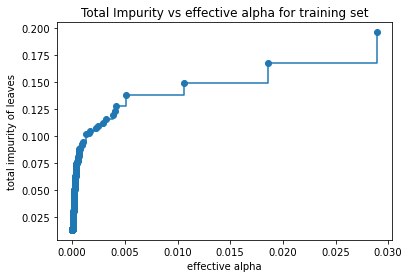

In [52]:
wp_model_after = DecisionTreeClassifier(random_state=1234)
path = wp_model_after.cost_complexity_pruning_path(wp_x_train, wp_y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [53]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(wp_x_train, wp_y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 3 with ccp_alpha: 0.29777666539024755


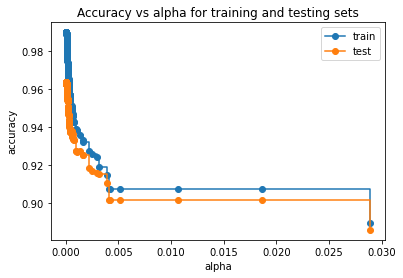

In [54]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

train_scores = [clf.score(wp_x_train, wp_y_train) for clf in clfs]
test_scores = [clf.score(wp_x_test, wp_y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

Pick the 0.004 as ccp_alpha for puring the tree. 

In [55]:
wp_model_after = DecisionTreeClassifier(random_state=1234,ccp_alpha=0.004)
t, p = paired_ttest_kfold_cv(estimator1=wp_model_after,
                              estimator2=wp_search,
                              X=wp_x, y=wp_y,
                              random_seed=1234)
print('t statistic: %.3f' % t)
print('p value: %.3f' % p)
score = wp_model_after.score(wp_x_test, wp_y_test)
print('Accuracy on post purn decision tree test set: {:.2f}%'.format(score * 100))
score = wp_search.score(wp_x_test, wp_y_test)
print('Accuracy on pur pruned decision tree test set: {:.2f}%'.format(score * 100))

t statistic: -5.687
p value: 0.000
Accuracy on post purn decision tree test set: 91.45%
Accuracy on pur pruned decision tree test set: 98.51%


From the t-test result, the post purn decision tree is worse than pre-purning tree.

###### BCP dataset

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

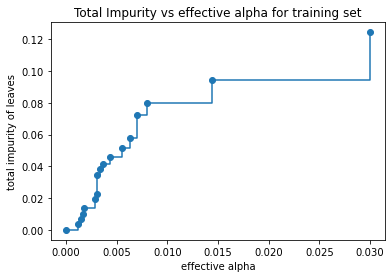

In [56]:
bcp_model_after = DecisionTreeClassifier(random_state=1234)
path = bcp_model_after.cost_complexity_pruning_path(bcp_x_train, bcp_y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [57]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(bcp_x_train, bcp_y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.33257339029853983


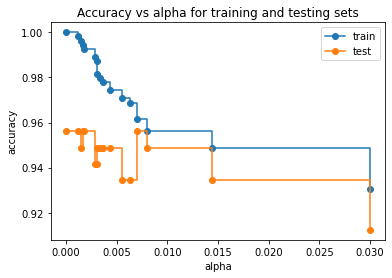

In [58]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

train_scores = [clf.score(bcp_x_train, bcp_y_train) for clf in clfs]
test_scores = [clf.score(bcp_x_test, bcp_y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

Take 0.007 as ccp_alpha. 

In [59]:
bcp_model_after = DecisionTreeClassifier(random_state=1234,ccp_alpha=0.007)
t, p = paired_ttest_kfold_cv(estimator1=bcp_model_after,
                              estimator2=bcp_search,
                              X=bcp_x, y=bcp_y,
                              random_seed=1234)
print('t statistic: %.3f' % t)
print('p value: %.3f' % p)
score = bcp_model_after.score(bcp_x_test, bcp_y_test)
print('Accuracy on post purn decision tree test set: {:.2f}%'.format(score * 100))
score = bcp_search.score(bcp_x_test, bcp_y_test)
print('Accuracy on pur pruned decision tree test set: {:.2f}%'.format(score * 100))

t statistic: 1.231
p value: 0.250
Accuracy on post purn decision tree test set: 97.81%
Accuracy on pur pruned decision tree test set: 98.54%


Because p value is 0.25, which is greater than 0.05, that's means the error rates of post-purning decision tree and pre-puring decision tree are the same. There is no evidence support that there is statistically difference between post-purning decision tree and pre-puring decision tree.

###### arrhythmia dataset

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

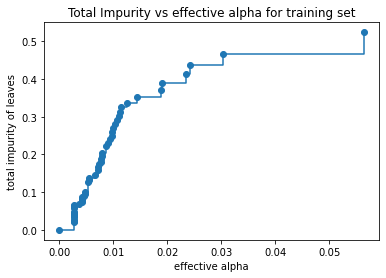

In [60]:
arrhythmia_model_after = DecisionTreeClassifier(random_state=1234)
path = bcp_model_after.cost_complexity_pruning_path(arrhythmia_x_train, arrhythmia_y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [61]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(arrhythmia_x_train, arrhythmia_y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.06924081868043847


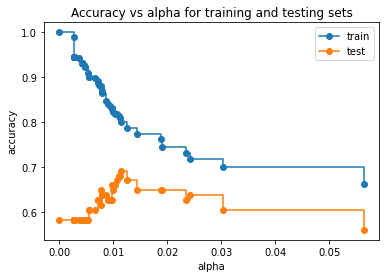

In [62]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

train_scores = [clf.score(arrhythmia_x_train, arrhythmia_y_train) for clf in clfs]
test_scores = [clf.score(arrhythmia_x_test, arrhythmia_y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

Take 0.011 as ccp_alpha value for post-puring decision tree. 

In [63]:
arrhythmia_model_after = DecisionTreeClassifier(random_state=1234,ccp_alpha=0.011)
t, p = paired_ttest_kfold_cv(estimator1=arrhythmia_model_after,
                              estimator2=arrhythmia_search,
                              X=arrhythmia_x, y=arrhythmia_y,
                              random_seed=1234)
print('t statistic: %.3f' % t)
print('p value: %.3f' % p)
score = arrhythmia_model_after.score(arrhythmia_x_test, arrhythmia_y_test)
print('Accuracy on post purn decision tree test set: {:.2f}%'.format(score * 100))
score = arrhythmia_search.score(arrhythmia_x_test, arrhythmia_y_test)
print('Accuracy on pur pruned decision tree test set: {:.2f}%'.format(score * 100))

C:\Users\zhaog\anaconda3\envs\venv\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\zhaog\anaconda3\envs\venv\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\zhaog\anaconda3\envs\venv\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\zhaog\anaconda3\envs\venv\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\zhaog\anaconda3\envs\venv\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=

t statistic: 1.534
p value: 0.159
Accuracy on post purn decision tree test set: 75.82%
Accuracy on pur pruned decision tree test set: 79.12%


Because p value is 0.159, which is greater than 0.05, that's means the error rates of post-purning decision tree and pre-puring decision tree are the same. There is no evidence support that there is statistically difference between post-purning decision tree and pre-puring decision tree.